In [15]:
# importing all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt 
import numpy.polynomial.legendre as leg #for finding the legendre nodes
import numpy.linalg as lin
from tqdm import tqdm
import sympy
from sympy import simplify
from sympy import Symbol
from sympy import integrate
from numpy import random

In [5]:
#Question 2: Forming the Polynomial of Legendre and Chebyshev nodes that approximate |x|

#Using some functions defined back in assignment 2

def mod(x): #function that returns the polynomial required in the assignment
    return np.abs(x)

def chebyshev_nodes(n): #function takes input n and returns the chebyshev nodes for the n^th order chebyshev polynomial
    a = np.array(range(n))
    return np.cos(((2*a+1)/(2*n))*np.pi)

def legendre_nodes(n): # function takes input n and returns the legendre nodes for the n^th order legendre polynomial
    x_legendre = np.zeros(n+1)
    x_legendre[-1] = 1
    x_legendre = leg.legroots(x_legendre) #computes the roots of the legendre polynomial of order n
    return x_legendre

#function takes the nodes and integer i and returns the lagrange polynomial li(x)
def compute_lag(x_nodes,i):
    x = Symbol('x',real = True)
    N = len(x_nodes)
    y = 1
    for j in range(N):
        if(j!=i):
            y = np.multiply((x-x_nodes[j])/(x_nodes[i]-x_nodes[j]),y) #evaluates the i^th lagrange polynomial
    return y

#function takes the function values at the nodes, nodes and evaluates the lagrange interpolant 
def interp_poly(f_nodes,x_nodes): #function to calculate interpolant
    N = len(x_nodes)
    f = 0
    for i in range(N):
        f += f_nodes[i]*compute_lag(x_nodes,i)
    
    return f


def Two_norm(f): #two norm of the function f(x)
     return np.sqrt(float(integrate(np.abs(f)**2,(x,-1,1))))
    
def inf_norm(f): #infinity norm of the function f(x)
    x_pts = np.linspace(-1,1,101) #sweeping x across -1,1 and including 0 which looks like the maxima on studying the curve
    val = []

    for c in x_pts:
        val.append(float(f.subs(x,c)))
        
    return max(np.abs(val))
        
    
    
    
    

In [12]:
N = 4

cheb_nodes = chebyshev_nodes(N)
leg_nodes  = legendre_nodes(N)
f_c        = mod(cheb_nodes)
f_l        = mod(leg_nodes)

#lagrange interpolant using legendre nodes
print('P_l: ', simplify(interp_poly(f_l,leg_nodes)))

#lagrange interpolant using chebyshev nodes
print('P_c: ',simplify(interp_poly(f_c,cheb_nodes)))

P_l = simplify(interp_poly(f_l,leg_nodes))
P_c = simplify(interp_poly(f_c,cheb_nodes))

x = Symbol('x',real=True)
P   = x**2 + 1/8
print('P: ',P)
f = np.abs(x)

# The errors
e_p = simplify(P-f)
e_l = simplify(P_l-f)
e_c = simplify(P_c-f)


#Computing the 2 norm of the errors
print("Two norm of p(x) case: ",np.around(Two_norm(e_p),5))
print("Two norm of p_l(x) case: ",np.around(Two_norm(e_l),5))
print("Two norm of p_c(x) case: ",np.around(Two_norm(e_c),5))

#Computing the infinite norm of the errors
print("Infinity norm of p(x) case: ",np.around(inf_norm(e_p),5))
print("Infinity norm of p_l(x) case: ",np.around(inf_norm(e_l),5))
print("Infinity norm of p_c(x) case: ",np.around(inf_norm(e_c),5))

P_l:  -4.44089209850063e-16*x**3 + 0.832558114066254*x**2 + 1.66533453693773e-16*x + 0.243748057275345
P_c:  -1.11022302462516e-16*x**3 + 0.765366864730179*x**2 + 8.32667268468867e-17*x + 0.270598050073099
P:  x**2 + 0.125
Two norm of p(x) case:  0.12076
Two norm of p_l(x) case:  0.11523
Two norm of p_c(x) case:  0.13041
Infinity norm of p(x) case:  0.125
Infinity norm of p_l(x) case:  0.24375
Infinity norm of p_c(x) case:  0.2706


In [13]:
#nodes used
print(leg_nodes)
print(cheb_nodes)

[-0.86113631 -0.33998104  0.33998104  0.86113631]
[ 0.92387953  0.38268343 -0.38268343 -0.92387953]


  4%|███▏                                                                               | 3/79 [00:00<00:02, 29.21it/s]

True value of the integral 0.4387636120312779


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [01:13<00:00,  1.07it/s]


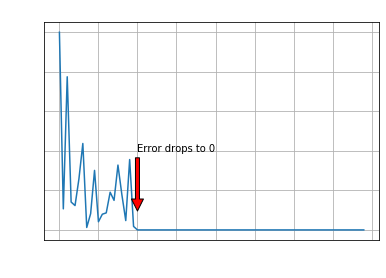

In [16]:
#Question 4: Trapezoidal Rule

#function 

x = Symbol('x',real=True)

N = 20

a = random.uniform(-1,1,N+1)
b = random.uniform(-1,1,N)

func = a[0]
for k in range(N):
    func += a[k+1]*sympy.cos(2*(k+1)*np.pi*x)+b[k]*sympy.sin(2*(k+1)*np.pi*x)

#true value of the integral

true_value = a[0]

print('True value of the integral',true_value)

#value of the integral through trapezoidal rule

error_TR = []

for n in tqdm(range(2,81)):
    nodes = np.linspace(0,1,n)
    x_0 = nodes[0]
    x_N = nodes[-1]
    h = 1/(n-1)
    TR = (h/2)*(float(func.subs(x,x_0))+float(func.subs(x,x_N)))
    for i in range(1,len(nodes)-1):
        TR += h*(float(func.subs(x,nodes[i])))
                    
    error_TR.append(np.abs(TR - true_value))
    
#print(error_TR)

plt.plot(error_TR)
plt.xlabel('<-n->',color = 'white')
plt.ylabel('Abs error',color = 'white')
plt.title('Absolute Error in the integral using Trapezoidal Rule',color = 'white')
plt.grid('True')
plt.annotate('Error drops to 0', xy =(20, 0.2), xytext =(20, 1),  arrowprops = dict(facecolor ='red',shrink = 0.05))
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

    

100%|████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 1207.14it/s]


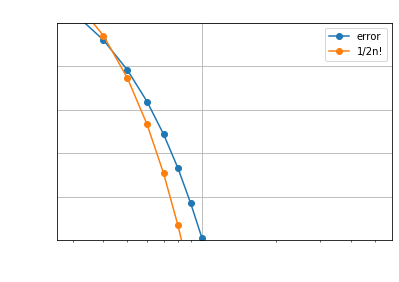

In [17]:
# Question 5: Gaussian Quadrature for integral of e^-x^2 from -1 to 1

True_Value = np.around(1.4936482656248540507989348722637060107089993736252126580553089979,20) #rounding true value obtained from wolfram alpha to 20 decimal places

def Gauss_Quad(n):
    leg_nodes,w = leg.leggauss(n+1)
    f = np.e**(-leg_nodes**2)
    
    return np.sum(np.multiply(f,w))

def factorial(n): #actual value of the n!
    if (n == 1):
        return 1
    else:
        return n*factorial(n-1)

error_gauss = []
error_order = []
for n in tqdm(range(3,52)):
    error_gauss.append(np.abs(Gauss_Quad(n)-True_Value))
    error_order.append(1/factorial(2*n))
    
plt.loglog(np.arange(3,52),error_gauss,'o-',label = 'error')
plt.loglog(np.arange(3,52),error_order,'o-',label = '1/2n!')
plt.legend(loc = 'best')
plt.grid()
plt.ylabel('magnitude',color = 'white')
plt.ylim(10e-15,10e-5)
plt.xlabel('<-n->',color = 'white')
plt.title('Absolute Error made by Gaussian Quadrature',color = 'white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()
